Collab link: https://drive.google.com/file/d/1jvF-gdr9QX7M0KpwJOEfSRcR4JAhP2c8/view?usp=sharing

# _______Exercise 1: Initial Visualization _________

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib.animation import FuncAnimation, PillowWriter
from xgboost import XGBClassifier

import math
import imageio
import cv2
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
import glob
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
col = [f'{i}' for i in range(0,79)]

In [3]:
df = pd.read_csv('./Data/train/10153922_guitar.csv',names=col,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,324.035126,86.831093,0.878463,323.981079,171.369827,0.799845,249.601334,177.35202,0.76578,219.547394,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
1,325.000000,88.000000,1.000000,324.000000,172.000000,1.000000,250.000000,177.00000,1.00000,220.000000,...,2.371390,11.743038,0.0,2.371390,11.743038,0.0,NaN,NaN,NaN,NaN
2,325.000000,87.000000,1.000000,324.000000,171.000000,1.000000,250.000000,176.00000,1.00000,220.000000,...,2.329656,-17.432343,0.0,2.329656,-17.432343,0.0,NaN,NaN,NaN,NaN
3,325.000000,87.000000,1.000000,324.000000,171.000000,1.000000,250.000000,176.00000,1.00000,220.000000,...,-11.196712,-32.201286,0.0,-11.196712,-32.201286,0.0,NaN,NaN,NaN,NaN
4,325.000000,88.000000,1.000000,324.000000,172.000000,1.000000,250.000000,176.00000,1.00000,220.000000,...,-27.829948,-41.950783,0.0,-27.829948,-41.950783,0.0,NaN,NaN,NaN,NaN


Creating xy co-ordinate list

In [4]:
drop_list = ['75','76','77','78']
xy={}
cnt=0
for i in range(0,75,3):
    #drop_list.append(f'{i}')
    drop_list.append(f'{i+2}')
    xy[f'{cnt}']=[f'{i}',f'{i+1}']
    cnt=cnt+1
xy

{'0': ['0', '1'],
 '1': ['3', '4'],
 '2': ['6', '7'],
 '3': ['9', '10'],
 '4': ['12', '13'],
 '5': ['15', '16'],
 '6': ['18', '19'],
 '7': ['21', '22'],
 '8': ['24', '25'],
 '9': ['27', '28'],
 '10': ['30', '31'],
 '11': ['33', '34'],
 '12': ['36', '37'],
 '13': ['39', '40'],
 '14': ['42', '43'],
 '15': ['45', '46'],
 '16': ['48', '49'],
 '17': ['51', '52'],
 '18': ['54', '55'],
 '19': ['57', '58'],
 '20': ['60', '61'],
 '21': ['63', '64'],
 '22': ['66', '67'],
 '23': ['69', '70'],
 '24': ['72', '73']}

In [5]:
df_coord = df.copy()
df_coord = df_coord.drop(drop_list,axis=1)
df_coord.head()

,0,1,3,4,6,7,9,10,12,13,...,60,61,63,64,66,67,69,70,72,73
0,324.035126,86.831093,323.981079,171.369827,249.601334,177.35202,219.547394,295.887299,217.439453,412.430756,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,325.000000,88.000000,324.000000,172.000000,250.000000,177.00000,220.000000,296.000000,218.000000,413.000000,...,2.371390,11.743038,2.371390,11.743038,2.371390,11.743038,2.371390,11.743038,2.371390,11.743038
2,325.000000,87.000000,324.000000,171.000000,250.000000,176.00000,220.000000,296.000000,218.000000,413.000000,...,2.329656,-17.432343,2.329656,-17.432343,2.329656,-17.432343,2.329656,-17.432343,2.329656,-17.432343
3,325.000000,87.000000,324.000000,171.000000,250.000000,176.00000,220.000000,296.000000,218.000000,413.000000,...,-11.196712,-32.201286,-11.196712,-32.201286,-11.196712,-32.201286,-11.196712,-32.201286,-11.196712,-32.201286
4,325.000000,88.000000,324.000000,172.000000,250.000000,176.00000,220.000000,296.000000,218.000000,413.000000,...,-27.829948,-41.950783,-27.829948,-41.950783,-27.829948,-41.950783,-27.829948,-41.950783,-27.829948,-41.950783


Defining Connections of the joints

In [6]:
connections = {
    0:[1, 15, 16], 1:[8, 2, 5], 2:[3], 3:[4],
    4:[3], 5:[6], 6:[5, 7], 7:[6], 8:[1, 9, 12],
    9:[8], 10:[], 11:[], 12:[8], 13:[], 14:[], 15:[0, 17],
    16:[0, 18], 17:[15], 18:[16], 19:[], 20:[], 21:[], 22:[], 23:[], 24:[]
}

In [7]:
points = connections[0]
print(points)
#xy['15']
joint = 0
xy[f'{joint}']

[1, 15, 16]


['0', '1']

In [8]:
def update(frame):
    ax.clear()
    k=0
    for i in range(0,74,3):
        x_col = f'{i}'
        y_col = f'{i+1}'
        x, y = df_coord.loc[frame, x_col], df_coord.loc[frame, y_col]
        ax.plot(x, y, 'ro')  
        
    for joint, connected_joints in connections.items():
        xy_co=xy[f'{joint}']
        joint_x, joint_y = df_coord.loc[frame, xy_co[0]], df_coord.loc[frame, xy_co[1]]
        for connected_joint in connected_joints:
            xy_co_c = xy[f'{connected_joint}']
            connected_x, connected_y = df_coord.loc[frame, xy_co_c[0]], df_coord.loc[frame, xy_co_c[1]]
            ax.plot([joint_x, connected_x], [joint_y, connected_y], 'k-')


In [9]:
%matplotlib notebook

### Visualisation of Guitar playing

<IPython.core.display.Javascript object>


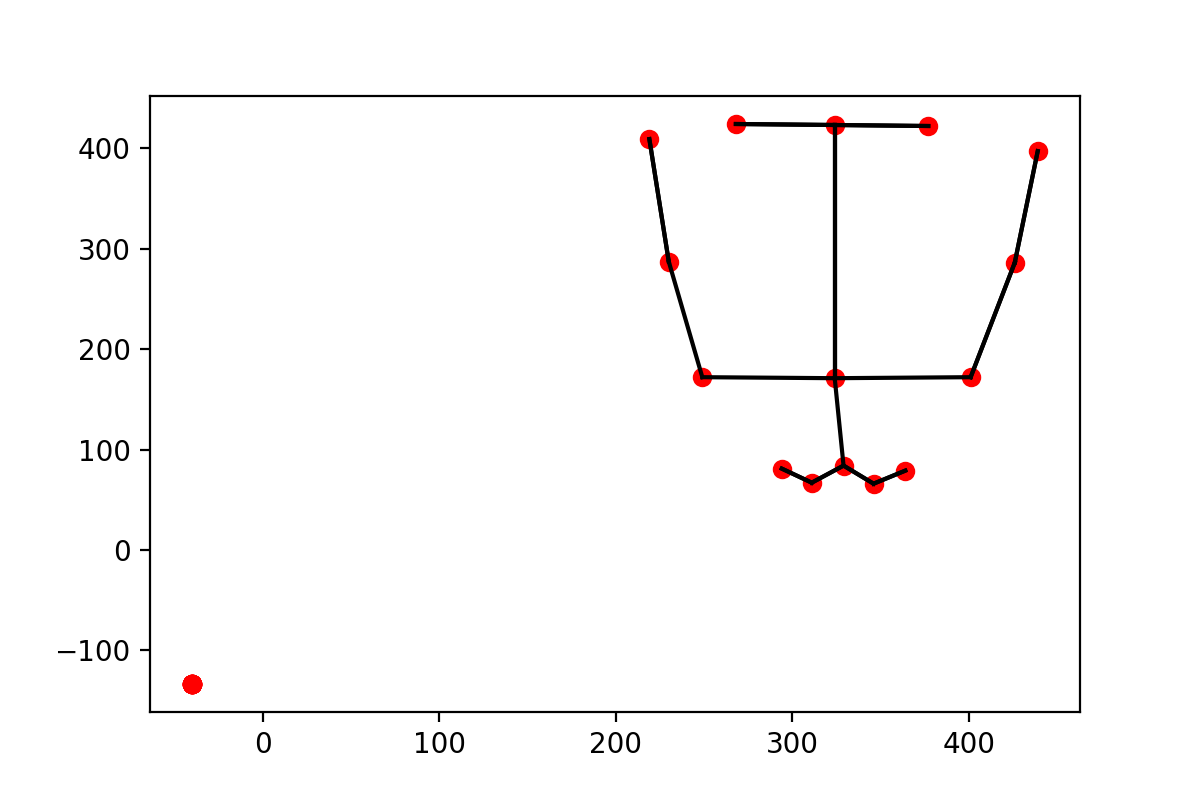

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
animation = FuncAnimation(fig, update, frames=df.index, repeat=False)
plt.show()

In [11]:
type(animation)

matplotlib.animation.FuncAnimation

In [12]:
animation.save('output_animation.gif', writer='pillow', fps=10)

# _____Exercise 2: Embedding and Modeling _____

## Data Preparation: Padding and Label Encoding

In [13]:
# Get csv files
directory_path = './Data/train/'
csv_files = glob.glob(directory_path + '*.csv')

# Load CSV files into a DataFrame and save true labels in train_labels list
dataframes_list = []
train_labels = []
for file in csv_files:
    temp = file.replace('.', '_')
    arr = temp.split('_')
    train_labels.append(arr[1])
    df = pd.read_csv(file, names=col,header=None)
    #Replace NA values by 0
    df.replace(np.nan, 0, inplace=True)
    dataframes_list.append(df)

In [14]:
len(train_labels)

1167

In [15]:
values, counts = np.unique(train_labels, return_counts=True)
print(values)
print(counts)

['boxing' 'drums' 'guitar' 'rowing' 'violin']
[243 230 230 235 229]


In [16]:
dataframes_list[0].head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,281.896088,143.142471,0.894997,295.892914,213.444427,0.900365,237.631271,213.499359,0.815841,217.5289,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,282.000000,143.000000,1.000000,296.000000,214.000000,1.000000,237.000000,214.000000,1.000000,216.0000,...,0.012544,0.375322,0.0,0.012544,0.375322,0.0,0.0,0.0,0.0,0.0
2,282.000000,143.000000,1.000000,296.000000,214.000000,1.000000,237.000000,214.000000,1.000000,215.0000,...,0.294774,1.156013,0.0,0.294774,1.156013,0.0,0.0,0.0,0.0,0.0
3,282.000000,143.000000,1.000000,296.000000,214.000000,1.000000,237.000000,214.000000,1.000000,214.0000,...,0.340671,1.454240,0.0,0.340671,1.454240,0.0,0.0,0.0,0.0,0.0
4,282.000000,143.000000,1.000000,296.000000,214.000000,1.000000,237.000000,214.000000,1.000000,212.0000,...,0.324183,1.486564,0.0,0.324183,1.486564,0.0,0.0,0.0,0.0,0.0


### Encoding the Labels

In [17]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(train_labels)

In [18]:
values, counts = np.unique(encoded_labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4]
[243 230 230 235 229]


### Padding to reshape the dataframes

In [19]:
# for df in dataframes_list:
#     print(df.shape)

Interpolation Padding:
Use interpolation to estimate the missing values based on the existing data. This method is more sophisticated and suitable to maintain the underlying patterns in the time series.

In [20]:
#Padding the dataframes so all the frames are of equal shape
common_length = 1000  
padded_dflist = []

for df in dataframes_list:
    df_padded = df.reindex(range(common_length)).interpolate(method='linear')
    #df_padded = df.reindex(range(common_length), fill_value=0)
    padded_dflist.append(df_padded)

In [21]:
print(padded_dflist[0].shape)
print(len(padded_dflist))

(1000, 79)
1167


In [22]:
width_3d = len(padded_dflist)
df_rows = common_length
df_columns = 75

## Computing Histograms: Get representation for every padded dataframe

<IPython.core.display.Javascript object>


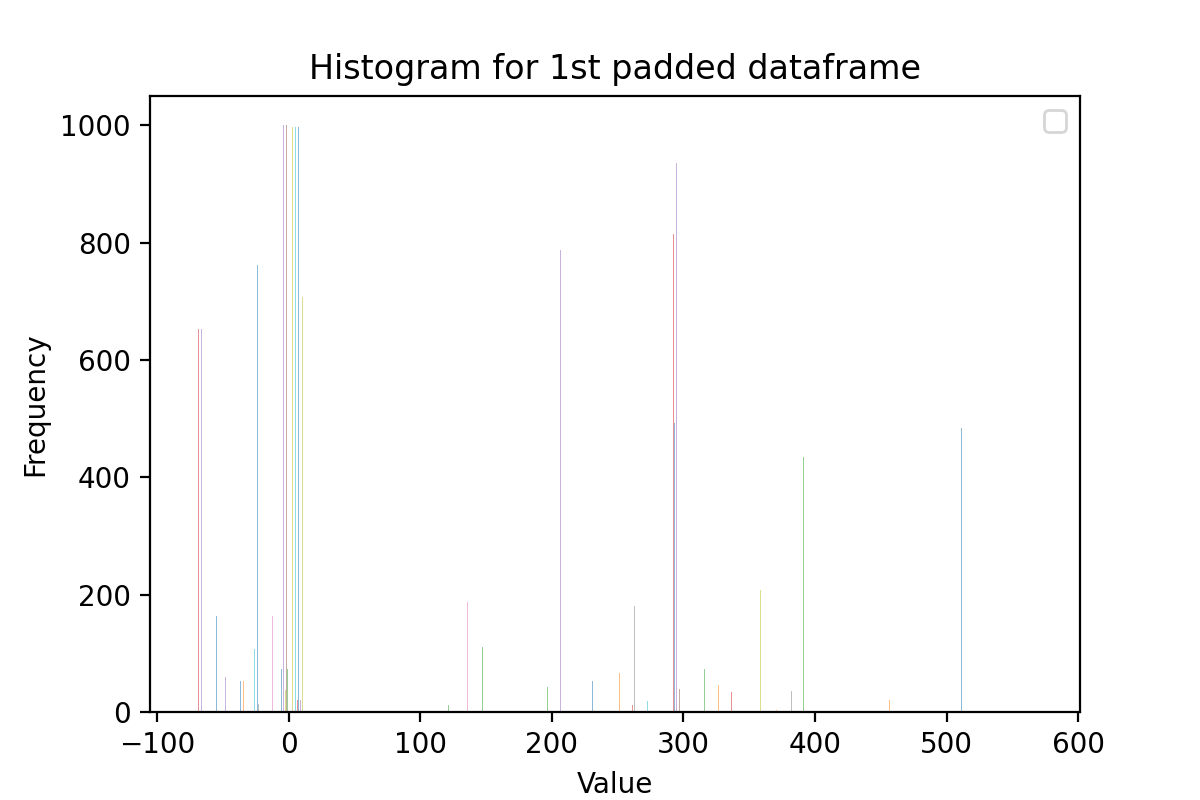

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Frequency')

In [23]:
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.hist(padded_dflist[0], bins=60, alpha=0.5)
ax1.legend()
ax1.set_title('Histogram for 1st padded dataframe')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

In [25]:
def create_histogram_representation(data):
    histograms_df = pd.DataFrame()
    histograms = data.apply(lambda x: np.histogram(x, bins=60)[0], axis=0)
    #histograms = data.apply(lambda x: np.histogram(x, bins=75)[0], axis=0)
    histogram_features = histograms.values.flatten()
    return histogram_features

In [26]:
histogram_features = []
feature_df = pd.DataFrame()

for df in padded_dflist:
    feature_df = create_histogram_representation(df)
    histogram_features.append(feature_df)

In [27]:
len(histogram_features)

1167

## Modeling: TRAIN Mean Accuracy - 90.67%

In [28]:
histogram_features[1].shape

(4740,)

In [29]:
X = np.vstack(histogram_features) 
y = encoded_labels

In [30]:
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=500,random_state=42)),
    #("XG Boost", XGBClassifier(n_estimators=500,learning_rate=0.2,random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Machine", SVC(kernel='linear',random_state=42)),
    ("Logistic Regression", LogisticRegression(max_iter=2000, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42))
]

Evaluation using Cross-Validation

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models:

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  #Cross Validation
    print(f"{model_name}: Cross-Validation Accuracy - {scores}")
    print(f"{model_name}: Mean Accuracy - {np.mean(scores)}\n")

Random Forest: Cross-Validation Accuracy - [0.9144385  0.9144385  0.90909091 0.88709677 0.90860215]
Random Forest: Mean Accuracy - 0.906733367833937

K-Nearest Neighbors: Cross-Validation Accuracy - [0.32085561 0.31550802 0.30481283 0.19892473 0.27419355]
K-Nearest Neighbors: Mean Accuracy - 0.28285895003162553

Support Vector Machine: Cross-Validation Accuracy - [0.65240642 0.6684492  0.65240642 0.60752688 0.58064516]
Support Vector Machine: Mean Accuracy - 0.6322868150192628

Logistic Regression: Cross-Validation Accuracy - [0.69518717 0.64705882 0.65775401 0.60215054 0.58602151]
Logistic Regression: Mean Accuracy - 0.6376344086021505

Decision Tree: Cross-Validation Accuracy - [0.68449198 0.68449198 0.67914439 0.6827957  0.59677419]
Decision Tree: Mean Accuracy - 0.6655396469438214



Selecting Random Forest Classifier

In [32]:
clf = RandomForestClassifier(n_estimators=500,random_state=42)
clf.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=42)

## Predicting values for Test data: TEST Accuracy - 92%

Loading the test data and sorting the files

In [33]:
# Get test files
test_directory_path = './Data/test/'
test_csv_files = os.listdir(test_directory_path)
test_df_list = []

test_csv_files.sort(key=lambda x: int(x.split('.')[0]))

for file in test_csv_files:
    df = pd.read_csv(test_directory_path+file, names=col,header=None)
    #Replace NA values by 0
    df.replace(np.nan, 0, inplace=True)
    test_df_list.append(df)
    
print(test_df_list[0].shape)
print(len(test_df_list))

(560, 79)
305


Padding the test dataframes

In [34]:
#Padding the dataframes so all the frames are of equal shape
test_common_length = 1000  
padded_test_dflist = []

for df in test_df_list:
    df_padded = df.reindex(range(test_common_length)).interpolate(method='linear')
    #df_padded = df.reindex(range(common_length), fill_value=0)
    padded_test_dflist.append(df_padded)
    
print(padded_test_dflist[0].shape)
print(len(padded_test_dflist))

(1000, 79)
305


Get histogram representation for test data

In [35]:
test_histogram_features = []
test_feature_df = pd.DataFrame()

for df in padded_test_dflist:
    test_feature_df = create_histogram_representation(df)
    test_histogram_features.append(test_feature_df)
    
len(test_histogram_features)

305

Predict Values

In [36]:
predicted_values = clf.predict(test_histogram_features)
len(predicted_values)

305

In [37]:
col1 = [i for i in range(0,305)]
col2 = predicted_values

output_file = pd.DataFrame({'id': col1, 'action': col2},index=None)
output_file.to_csv("Submission21.csv",index=None)

# ______Exercise 3: Evaluation ______

### Runtime Complexities and Sparsity

#### Tasks Performed:

1. Visualisation using Matplotlib


2. Data Preparation:
    - Importing the Dataframes - O(N)    ..(n is number of dataframes, data imported in a loop)
    - Padding the Dataframes - O(N)      ..(every dataframe processed once, and padding added to balance lengths)
    
    The memory needed for storing these dataframes in the first 2 tasks is O(rows.cols.dataframes) ie O(1000 . 79 . 1167). Since we have padded every dataframe to have 1000 rows and 79 columns.

3. Embedding:
    - Getting Histogram features - O(N)  ..(histogram features calculated for every dataframe and flattened)
    
    After embedding, the histogram features are stored in a list of size 1167. This list consists of array of features, 4740 per list item. Hence the Space complexity would be O(4740 . 1167)

4. Modeling:

Complexities of Random Forest Classifier:
- Time Complexity
    - Training Time: The time complexity for training a Random Forest is (N.log(N)). N is number of features which is 1167 in our case. log(N) is the depth of the tress. During training, each tree is constructed by recursively splitting the data based on features. We are fitting a model directly on the histogram features.
    - Prediction Time: The time complexity for making predictions on a new sample is O(log(N)) for each tree, as the sample traverses the tree from the root to a leaf node. Which would be O(log(1167)) in this case.
    
- Space Complexity
    - Space Complexity:The space complexity is influenced by the number of trees and the depth of each tree.The overall space complexity for storing the forest is O(K⋅N), where K is the number of trees(500 in our case) and N is the number of features(1167 in our case).

5. Cross-Validation

6. Testing:
    Selected Random Forest, and trained it with whole dataset. 
    Time Complexity for Testing: O(log(Nt)) = O(log(305)) in this case. (Nt is the number of test features)

#### Sparsity

Average number of zeros

In [38]:
total = 0
for df in dataframes_list:
    total = total + (df == 0).sum().sum()
avg = total/(len(dataframes_list))
print("Average number of zeros in a dataframe = ",avg)

Average number of zeros in a dataframe =  6937.606683804627


Calculating the sparsity of our model

In [39]:
feature_importances = clf.feature_importances_
less_important_features = [i for i, importance in enumerate(feature_importances) if importance < 0.0000005]
sparsity = len(less_important_features) / X.shape[1]

print(f"Sparsity: {sparsity}")

Sparsity: 0.2959915611814346


There are on an average 6k zeros in a dataframe. Also we calculate the sparsity and find that the dataframes are sparse.

This might be because not all joints or features are present or active at all times, since the data is temporal. In one time frame, only some joints might be visible, others for rest and so on..  

Sparsity also introduces the risk of overfitting, especially if the model interprets missing values as meaningful patterns. 

Also we notice that there are a lot of NaN values(in last 4 columns), and we also have to do padding so that all the dataframes are of same size. We choose to interpolate the padding values, instead of padding with zero to handle the sparsity issue.

Since the dataset is sparse, the choice of machine learning models is crucial in handling sparsity. Models capable of handling missing values, such as decision trees, random forest give a better accuracy than other models evaluated above.

Few reasons why Random Forest works best on our sparse dataset:

- Robust to Irrelevant Features: Random Forest can naturally handle missing values in the dataset. During the training process, when a tree is built for a particular subset of data, it makes decisions based on available features without explicitly requiring handling of missing values.
- Ensemble Averaging: The ensemble nature of Random Forest, which aggregates predictions from multiple trees, tends to reduce overfitting. If some trees in the forest overfit to the sparsity in the data, the ensemble averaging tends to smooth out these effects, resulting in a generalized model.
- Non-parametric Nature: Random Forest does not make strong assumptions about the underlying distribution of the data. This flexibility allows it to adapt well to diverse datasets, including those with sparse features.
- Decomposition of Complexity: The algorithm decomposes the complexity of the problem by building multiple simple decision trees. Each tree contributes a vote to the final prediction, and this ensemble approach helps capture the underlying patterns while minimizing the impact of sparsity.

### Evaluation already done using Cross Validation in Modeling Part

Tried 5 different Models with accuracy as follows:
   - Random Forest: Mean Accuracy - 0.9067
   - K-Nearest Neighbors: Mean Accuracy - 0.2828
   - Support Vector Machine: Mean Accuracy - 0.6322
   - Logistic Regression: Mean Accuracy - 0.6376
   - Decision Tree: Mean Accuracy - 0.6655

Got the best accuracy for Random Forest Classifier: 90%

Test Accuracy: 92%